In [3]:
import numpy as np
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [11]:
# Load data
data = read_csv(r"C:\Users\zhouq\OneDrive - Nanyang Technological University\FYP\Codes\FYP\Data_transform.csv", header = 0, index_col=0, parse_dates=True, dayfirst=False)

# Select 3 exogenous variables 
# M1: Industrial Production Index
# M4: Payroll All Employees: Total nonfarm
# M5: Housing Starts: Total New Privately Owned
data_new = data[['GDP', 'M1', 'M4','M5']]
data_new = data_new.dropna()
display(data_new)

# Split the data into training and testing sets
train_size = int(len(data_new) * 0.8)
train, test = data_new[:train_size], data_new[train_size:]

GDP_fill_data  = pd.DataFrame(data_new['GDP'])
GDP_fill_data.index = GDP_fill_data.index + pd.offsets.QuarterEnd(0)
GDP_fill_data_train, GDP_fill_data_test = GDP_fill_data[:train_size], GDP_fill_data[train_size:]
display(GDP_fill_data_train)

x_data = pd.DataFrame(data_new.iloc[:, 1:])
x_train, x_test = x_data[:train_size], x_data[train_size:]

display(x_train)

,GDP,M1,M4,M5
Date,,,,
1959-06-30,0.022301,0.012391,0.004168,7.332865
1959-09-30,0.000705,-0.019971,-0.001575,7.316347
1959-12-31,0.002845,0.019589,0.004622,7.281844
1960-03-31,0.022228,0.002654,0.001718,7.204208
1960-06-30,-0.005405,-0.007252,-0.000649,7.145892
...,...,...,...,...
2018-12-31,0.002229,-0.000848,0.001212,7.057013
2019-03-29,0.005960,-0.003236,0.000788,7.086399
2019-06-28,0.007898,-0.001557,0.001012,7.149682


,GDP
Date,
1959-06-30,0.022301
1959-09-30,0.000705
1959-12-31,0.002845
1960-03-31,0.022228
1960-06-30,-0.005405
...,...
2006-09-30,0.001503
2006-12-31,0.008402
2007-03-31,0.002932


,M1,M4,M5
Date,,,
1959-06-30,0.012391,0.004168,7.332865
1959-09-30,-0.019971,-0.001575,7.316347
1959-12-31,0.019589,0.004622,7.281844
1960-03-31,0.002654,0.001718,7.204208
1960-06-30,-0.007252,-0.000649,7.145892
...,...,...,...
2006-09-29,0.000686,0.001264,7.439508
2006-12-29,0.002802,0.000988,7.357986
2007-03-30,0.002561,0.001319,7.286771


In [12]:
# Create the model
mod = sm.tsa.DynamicFactor(endog= train, k_factors=1, factor_order=1, error_order=1)
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

print(res.summary(separate_params=False))


c:\Users\zhouq\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  self._init_dates(dates, freq)


                                   Statespace Model Results                                  
Dep. Variable:             ['GDP', 'M1', 'M4', 'M5']   No. Observations:                  194
Model:             DynamicFactor(factors=1, order=1)   Log Likelihood                2737.163
                                      + AR(1) errors   AIC                          -5448.325
Date:                               Mon, 19 Feb 2024   BIC                          -5405.843
Time:                                       06:49:32   HQIC                         -5431.123
Sample:                                   06-30-1959                                         
                                        - 09-28-2007                                         
Covariance Type:                                 opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

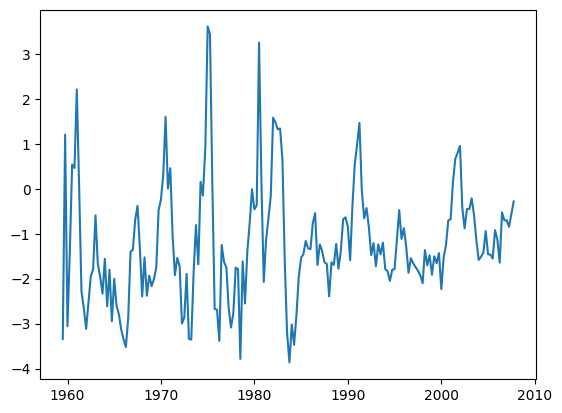

In [21]:
# Plot the factor
plt.plot(data_new.index[:len(train)], res.factors.filtered[0], label='Factor')

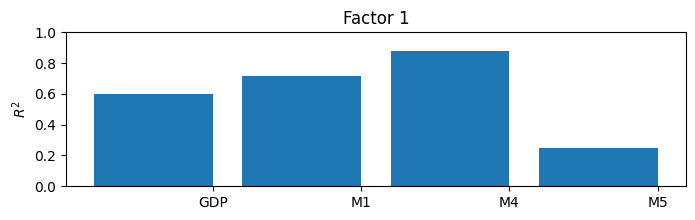

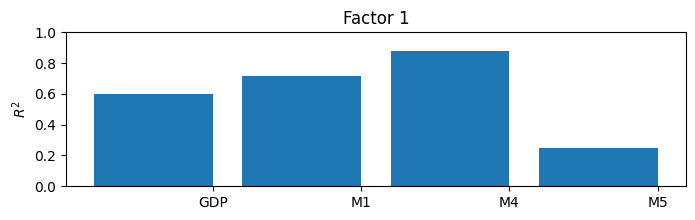

In [19]:
res.plot_coefficients_of_determination(figsize=(8,2))